In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import random
import albumentations as A

In [2]:
ticTacToe = [imgFile for imgFile in os.listdir('TicTacToe/boards/raw') if imgFile.endswith('.jpg')]
connectFour = os.listdir('ConnectFour/labelren/pictures')
chess = [imgFile for imgFile in os.listdir('Chess/labelren') if imgFile.endswith('.png')]
background = os.listdir('Backgrounds')


tictactoeTransform = A.Compose([
    A.augmentations.geometric.transforms.Perspective(p=1, scale=(0.005, 0.02)),
    A.augmentations.transforms.OpticalDistortion(p=0.2),
    A.augmentations.geometric.transforms.ElasticTransform(p=1, alpha=1, sigma=4, alpha_affine=4),
    A.RandomCrop(160, 160, p=0.25),
    A.InvertImg(p=0.1),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.12),
    A.Blur(blur_limit=3, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.22, tile_grid_size=(4, 4)),
    A.Sharpen(p=0.18, alpha=0.2, lightness=1.5),
    A.Emboss(p=0.18),
    A.Equalize(p=0.04),
    A.MultiplicativeNoise(p=0.22),
    A.Resize(168, 168, p=1.0),
    A.RandomBrightness(p=0.22),
    A.RandomContrast(p=0.22),
    A.RandomGamma(p=0.22),
    A.Solarize(threshold=128, p=0.2),
])

/home/robert/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/robert/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1639: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [3]:
def tic_tac_toe_image():
    img = Image.open(
        'TicTacToe/boards/raw/' + random.choice(ticTacToe)
    ).convert('RGB')
    img = np.array(img)
    img = tictactoeTransform(image=img)['image']
    return Image.fromarray(img)

def connect_four_image():
    img = Image.open(
        'ConnectFour/labelren/pictures/' + random.choice(connectFour)
    ).resize((168, 168))
    backgroundImage = Image.open(
        'Backgrounds/' + random.choice(background)
    )
    bgCoords = [random.randint(0, backgroundImage.size[0] - 168), random.randint(0, backgroundImage.size[1] - 168)]
    backgroundImage = backgroundImage.crop((
                    *bgCoords,
                    *[x + 168 for x in bgCoords]
                ))
    backgroundImage.paste(img, (0, 0), img)
    backgroundImage.convert('RGB')
    return backgroundImage

def chess_image():
    img = Image.open(
        'Chess/labelren/' + random.choice(chess)
    ).resize((168, 168))
    backgroundImage = Image.open(
        'Backgrounds/' + random.choice(background)
    ).convert('RGB')
    bgCoords = [random.randint(0, backgroundImage.size[0] - 168), random.randint(0, backgroundImage.size[1] - 168)]
    backgroundImage = backgroundImage.crop((
                    *bgCoords,
                    *[x + 168 for x in bgCoords]
                ))
    backgroundImage.paste(img, (0, 0), img)
    backgroundImage.convert('RGB')
    return backgroundImage


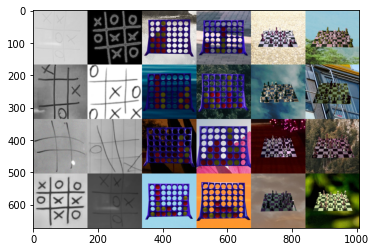

In [8]:
imgWall = Image.new('RGB', (168 * 6, 168 * 4))

for row in range(4):
    for col in range(6):
        if col < 2:
            img = tic_tac_toe_image()

        elif col < 4:
            img = connect_four_image()

        else:
            img = chess_image()
        
        imgWall.paste(
            img,
            (col * 168, row * 168)
        )

# imgWall.save('../data.jpg')
plt.imshow(imgWall)